# Capstone Project: Analysis and Prediction of Hate Crimes in the United States

## Note: Download the csv and ipynb file at one location for successful execution

In [65]:
import findspark
findspark.init()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from datetime import datetime
from pyspark.sql.functions import col,udf
from pyspark.sql.functions import format_number

In [55]:
df_main = spark.read.csv("hate_crime.csv", header = True)

In [56]:
df_main = df_main.withColumn("ADULT_VICTIM_COUNT",df_main["ADULT_VICTIM_COUNT"].cast('int'))
df_main = df_main.withColumn("JUVENILE_VICTIM_COUNT",df_main["JUVENILE_VICTIM_COUNT"].cast('int'))
df_main = df_main.withColumn("TOTAL_OFFENDER_COUNT",df_main["TOTAL_OFFENDER_COUNT"].cast('int'))
df_main = df_main.withColumn("ADULT_OFFENDER_COUNT",df_main["ADULT_OFFENDER_COUNT"].cast('int'))
df_main = df_main.withColumn("JUVENILE_OFFENDER_COUNT",df_main["JUVENILE_OFFENDER_COUNT"].cast('int'))
df_main = df_main.withColumn("TOTAL_INDIVIDUAL_VICTIMS",df_main["TOTAL_INDIVIDUAL_VICTIMS"].cast('int'))

In [57]:
df_main.select("INCIDENT_DATE").show()

+-------------+
|INCIDENT_DATE|
+-------------+
|    31-AUG-91|
|    19-SEP-91|
|    04-JUL-91|
|    24-DEC-91|
|    23-DEC-91|
|    27-JUL-91|
|    14-NOV-91|
|    10-JUL-91|
|    06-OCT-91|
|    04-OCT-91|
|    06-OCT-91|
|    14-OCT-91|
|    15-JAN-91|
|    22-JAN-91|
|    23-JAN-91|
|    04-FEB-91|
|    14-FEB-91|
|    20-FEB-91|
|    21-FEB-91|
|    13-MAR-91|
+-------------+
only showing top 20 rows



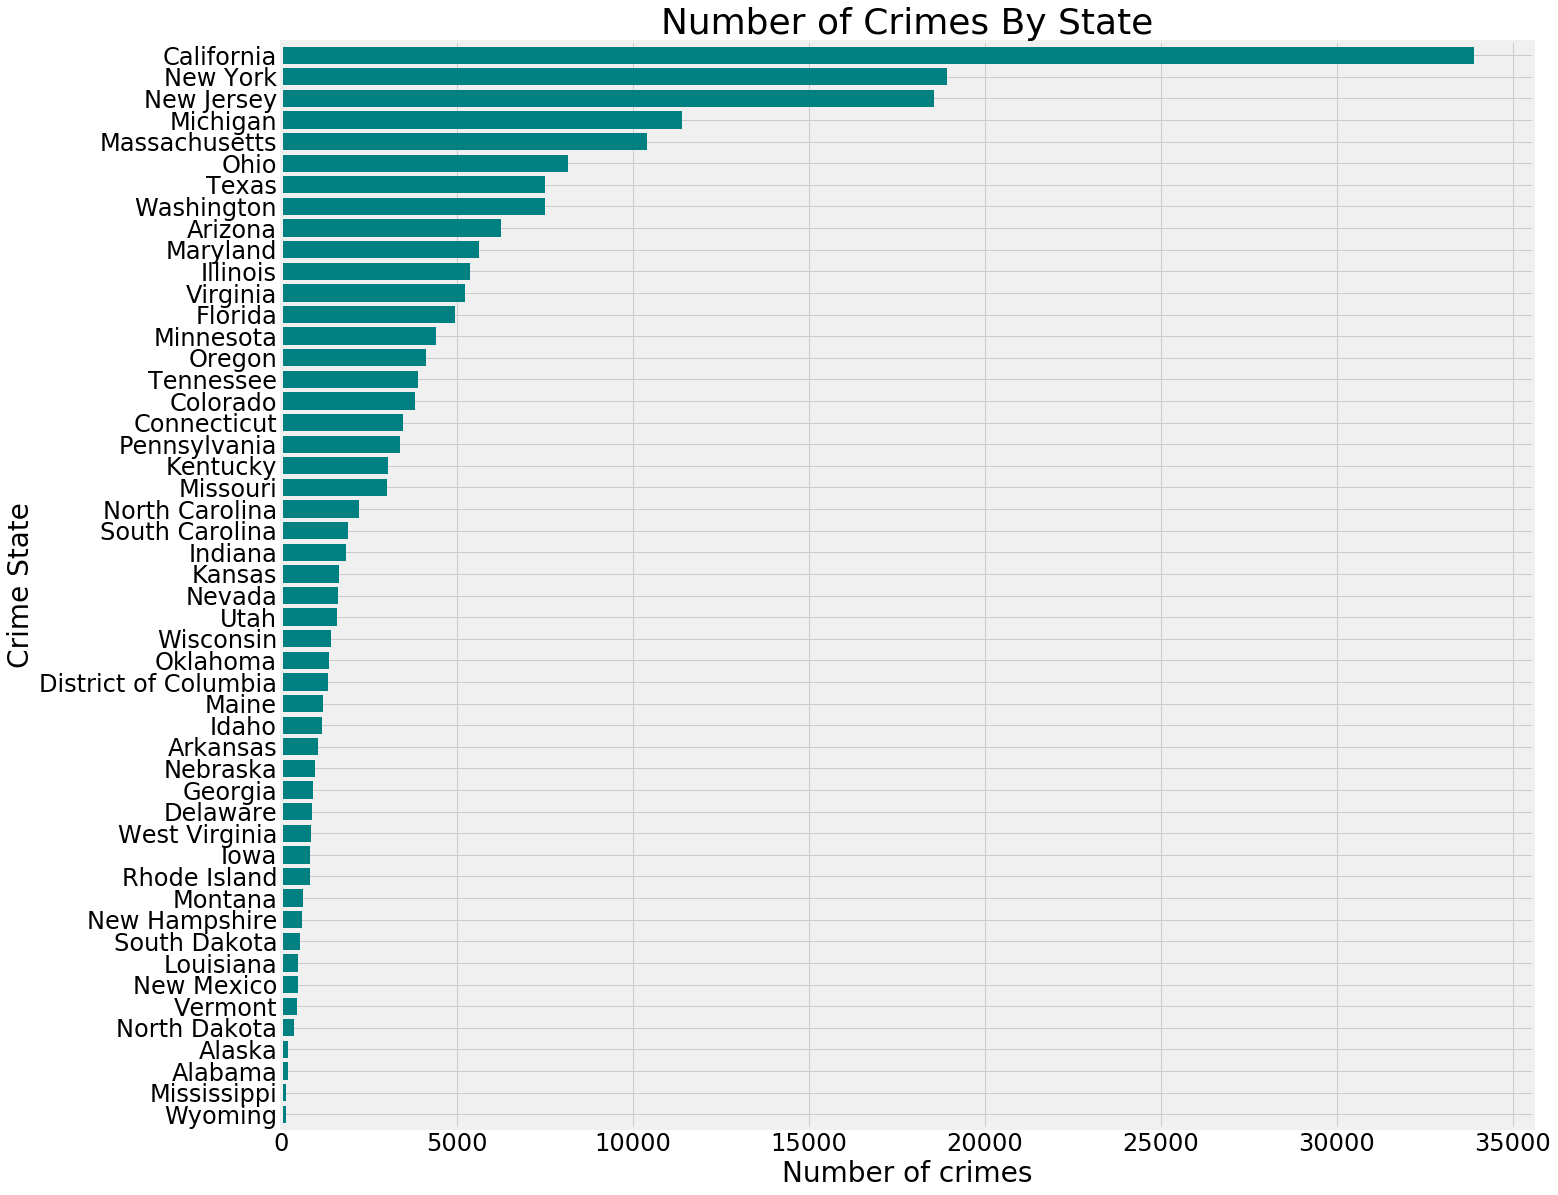

In [64]:
crime_state  = df_main.groupBy("STATE_NAME").count().collect()
state = [item[0] for item in crime_state]
count = [item[1] for item in crime_state]
crime_state = {"state" : state, "count": count}
crime_state = pd.DataFrame(crime_state)
crime_state = crime_state.sort_values(by = "count", ascending  = False)
crime_state = crime_state.iloc[:50]
myplot = crime_state.plot(figsize = (20,20), kind = "barh", color = "teal", width = 0.8,
                               x = "state", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime State", fontsize = 28)
plt.title("Number of Crimes By State", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [59]:
df_main.groupBy("INCIDENT_DATE").count().show()
df_main.groupBy("INCIDENT_DATE").count().collect()
count = [item[1] for item in df_main.groupBy("INCIDENT_DATE").count().collect()]
year = [item[0] for item in df_main.groupBy("INCIDENT_DATE").count().collect()]
number_of_crimes_per_year = {"count":count, "year" : year}
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)
number_of_crimes_per_year.head()

+-------------+-----+
|INCIDENT_DATE|count|
+-------------+-----+
|    23-JAN-91|   11|
|    03-FEB-91|   16|
|    16-NOV-91|   17|
|    15-FEB-91|   11|
|    13-AUG-94|   15|
|    07-MAR-95|   25|
|    07-DEC-96|   23|
|    04-APR-97|   15|
|    20-NOV-97|   22|
|    09-MAR-97|   24|
|    12-SEP-98|   28|
|    28-SEP-98|   27|
|    28-APR-99|   32|
|    24-SEP-99|   27|
|    02-DEC-00|   14|
|    03-MAY-00|   20|
|    22-MAR-00|   26|
|    24-JAN-00|   25|
|    15-APR-01|   25|
|    20-DEC-03|   17|
+-------------+-----+
only showing top 20 rows



,count,year
0,11,23-JAN-91
1,16,03-FEB-91
2,17,16-NOV-91
3,11,15-FEB-91
4,15,13-AUG-94


In [10]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df_main = pd.read_csv('hate_crime.csv' , low_memory=False)
df_main = spark.read.format("csv").option("inferSchema", 
           True).option("header", True).load('C:/Users/rdcosta/Desktop/hate_crime.csv')

In [12]:
display(df_main)

DataFrame[INCIDENT_ID: int, DATA_YEAR: int, ORI: string, PUB_AGENCY_NAME: string, PUB_AGENCY_UNIT: string, AGENCY_TYPE_NAME: string, STATE_ABBR: string, STATE_NAME: string, DIVISION_NAME: string, REGION_NAME: string, POPULATION_GROUP_CODE: string, POPULATION_GROUP_DESC: string, INCIDENT_DATE: string, ADULT_VICTIM_COUNT: int, JUVENILE_VICTIM_COUNT: int, TOTAL_OFFENDER_COUNT: int, ADULT_OFFENDER_COUNT: int, JUVENILE_OFFENDER_COUNT: int, OFFENDER_RACE: string, OFFENDER_ETHNICITY: string, VICTIM_COUNT: int, OFFENSE_NAME: string, TOTAL_INDIVIDUAL_VICTIMS: int, LOCATION_NAME: string, BIAS_DESC: string, VICTIM_TYPES: string, MULTIPLE_OFFENSE: string, MULTIPLE_BIAS: string]

In [13]:
df_main.createOrReplaceTempView("hate_crime")

In [14]:
df1 = spark.sql("select OFFENSE_NAME, COUNT(OFFENSE_NAME) offense_count from hate_crime group by OFFENSE_NAME order by offense_count DESC LIMIT 10")

In [15]:
df1 = df1.select("*").toPandas()

In [16]:
df1

,OFFENSE_NAME,offense_count
0,Destruction/Damage/Vandalism of Property,62147
1,Intimidation,58751
2,Simple Assault,38042
3,Aggravated Assault,20999
4,Robbery,3454
5,Burglary/Breaking & Entering,2670
6,Destruction/Damage/Vandalism of Property;Intim...,1774
7,All Other Larceny,1616
8,Arson,1091
9,Intimidation;Simple Assault,869


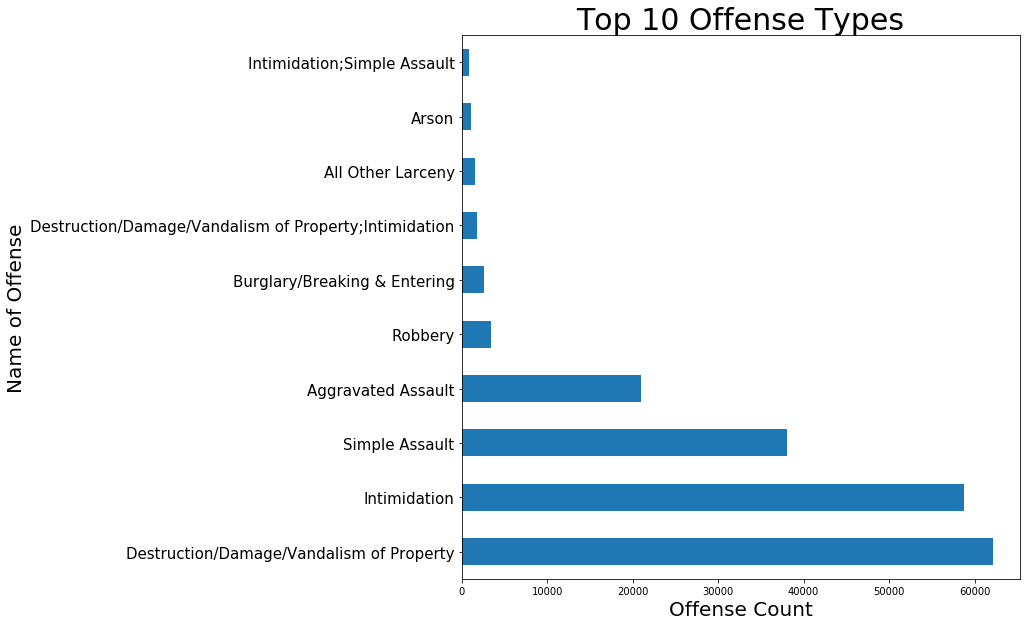

In [17]:
plot1 = df1.plot(kind='barh',x='OFFENSE_NAME',y='offense_count', legend = False , figsize = (10,10) )
plt.xlabel('Offense Count' , size = 20)
plt.ylabel('Name of Offense' , size = 20)
plt.title('Top 10 Offense Types' , size = 30)
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.show()

In [18]:
df2 = spark.sql("select OFFENSE_NAME, sum(TOTAL_INDIVIDUAL_VICTIMS) count_of_victims from hate_crime group by OFFENSE_NAME ORDER BY count_of_victims DESC LIMIT 5")

In [19]:
df2 = df2.select("*").toPandas()
df2.head()

,OFFENSE_NAME,count_of_victims
0,Intimidation,70032
1,Simple Assault,42874
2,Destruction/Damage/Vandalism of Property,32064
3,Aggravated Assault,26522
4,Robbery,3963


In [20]:
df2.loc[10] = ['Others',25949]

In [21]:
df2

,OFFENSE_NAME,count_of_victims
0,Intimidation,70032
1,Simple Assault,42874
2,Destruction/Damage/Vandalism of Property,32064
3,Aggravated Assault,26522
4,Robbery,3963
10,Others,25949


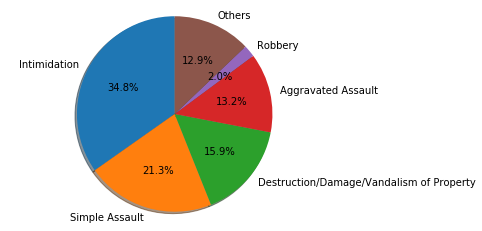

In [22]:
plt.pie(df2['count_of_victims'], labels=df2['OFFENSE_NAME'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [23]:
df3 = spark.sql("select LOCATION_NAME, COUNT(LOCATION_NAME) count_of_crimes from hate_crime group by LOCATION_NAME order by count_of_crimes DESC LIMIT 10")

In [24]:
df3.show()

+--------------------+---------------+
|       LOCATION_NAME|count_of_crimes|
+--------------------+---------------+
|      Residence/Home|          60071|
|Highway/Road/Alle...|          38150|
|       Other/Unknown|          27489|
|      School/College|          17388|
|Parking/Drop Lot/...|          11496|
|Church/Synagogue/...|           7595|
|Commercial/Office...|           4545|
|          Restaurant|           3999|
|       Bar/Nightclub|           3591|
|Government/Public...|           2933|
+--------------------+---------------+



In [25]:
import matplotlib as mpl
import squarify
import matplotlib.cm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df3 = df3.select("*").toPandas()
df3.head()

,LOCATION_NAME,count_of_crimes
0,Residence/Home,60071
1,Highway/Road/Alley/Street/Sidewalk,38150
2,Other/Unknown,27489
3,School/College,17388
4,Parking/Drop Lot/Garage,11496


In [27]:
df3

,LOCATION_NAME,count_of_crimes
0,Residence/Home,60071
1,Highway/Road/Alley/Street/Sidewalk,38150
2,Other/Unknown,27489
3,School/College,17388
4,Parking/Drop Lot/Garage,11496
5,Church/Synagogue/Temple/Mosque,7595
6,Commercial/Office Building,4545
7,Restaurant,3999
8,Bar/Nightclub,3591
9,Government/Public Building,2933


  ALIAS                       LOCATION_NAME
0     a                      Residence/Home
1     b  Highway/Road/Alley/Street/Sidewalk
2     c                       Other/Unknown
3     d                      School/College
4     e             Parking/Drop Lot/Garage
5     f      Church/Synagogue/Temple/Mosque
6     g          Commercial/Office Building
7     h                          Restaurant
8     i                       Bar/Nightclub
9     j          Government/Public Building


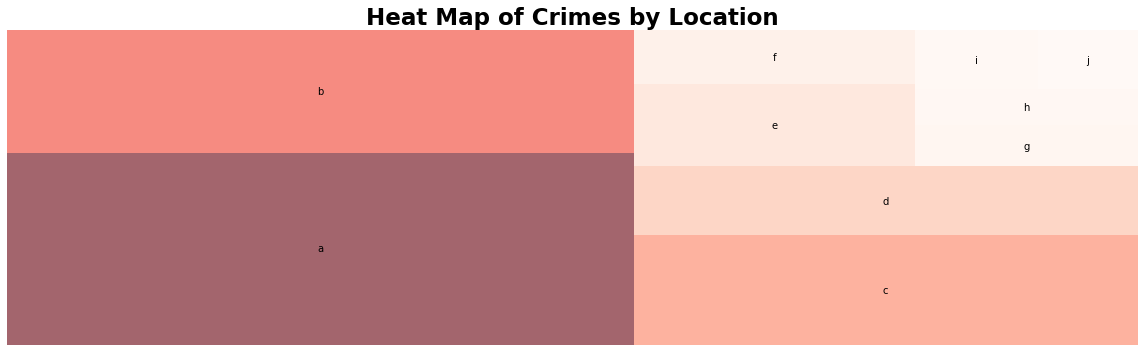

In [28]:
fig = plt.gcf()
fig.set_size_inches(16, 5)

data = [['a','Residence/Home'],['b','Highway/Road/Alley/Street/Sidewalk'],['c','Other/Unknown'],['d','School/College'],['e','Parking/Drop Lot/Garage'],['f','Church/Synagogue/Temple/Mosque'],['g','Commercial/Office Building'],['h','Restaurant'] , ['i' , 'Bar/Nightclub'] , ['j' , 'Government/Public Building']]
data_slice = pd.DataFrame(data, columns=['ALIAS','LOCATION_NAME'], )


print(data_slice)

norm = mpl.colors.Normalize(vmin=min(df3['count_of_crimes']), vmax=max(df3['count_of_crimes']))
colors = [mpl.cm.Reds(norm(value)) for value in (df3['count_of_crimes'])]

ax1 = squarify.plot(label=data_slice['ALIAS'], sizes=df3['count_of_crimes'], color=colors, alpha=.6)
plt.title("Heat Map of Crimes by Location", fontsize=23, fontweight="bold")
plt.axis('off')
#plt.legend(title='Legend', loc='center left',bbox_to_anchor=(1, 0.5),frameon=False)
plt.tight_layout()
plt.show()

In [29]:
data_slice

,ALIAS,LOCATION_NAME
0,a,Residence/Home
1,b,Highway/Road/Alley/Street/Sidewalk
2,c,Other/Unknown
3,d,School/College
4,e,Parking/Drop Lot/Garage
5,f,Church/Synagogue/Temple/Mosque
6,g,Commercial/Office Building
7,h,Restaurant
8,i,Bar/Nightclub
9,j,Government/Public Building


# Time Series Forecasting (Hate Crimes from 2019-2023)

In [30]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [31]:
df_main = pd.read_csv('C:/Users/rdcosta/Desktop/hate_crime.csv')

In [32]:
df_main['INCIDENT_DATE'] = pd.to_datetime(df_main['INCIDENT_DATE'], format= '%m/%d/%Y')

In [33]:
df_main['INCIDENT_DATE']

0        1991-08-31
1        1991-09-19
2        1991-07-04
3        1991-12-24
4        1991-12-23
            ...    
201398   2018-12-14
201399   2018-11-14
201400   2018-11-26
201401   2018-01-31
201402   2018-01-21
Name: INCIDENT_DATE, Length: 201403, dtype: datetime64[ns]

In [34]:
df_main['INCIDENT_YEAR'] = pd.DatetimeIndex(df_main['INCIDENT_DATE']).year

In [35]:
df_main

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,INCIDENT_YEAR
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,1991
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,1991
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,1991
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,1991
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201398,466130,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,2018
201399,466159,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,1,Simple Assault,1.0,School/College,Anti-Black or African American,Individual,S,S,2018
201400,508677,2018,WV0540200,Vienna,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S,2018
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,Unknown,1,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S,2018


In [36]:
df = pd.DataFrame(df_main['INCIDENT_DATE'])

In [37]:
df['COUNT'] = df.groupby(by='INCIDENT_DATE')['INCIDENT_DATE'].transform('count')

In [38]:
df = df.drop_duplicates(subset=['INCIDENT_DATE'])

In [39]:
df = df.set_index('INCIDENT_DATE')
df.index

DatetimeIndex(['1991-08-31', '1991-09-19', '1991-07-04', '1991-12-24',
               '1991-12-23', '1991-07-27', '1991-11-14', '1991-07-10',
               '1991-10-06', '1991-10-04',
               ...
               '2018-06-22', '2018-07-14', '2018-07-30', '2018-10-24',
               '2018-06-24', '2018-08-13', '2018-12-20', '2018-11-22',
               '2018-03-01', '2018-04-07'],
              dtype='datetime64[ns]', name='INCIDENT_DATE', length=10227, freq=None)

In [40]:
y = df['COUNT'].resample('MS').sum()

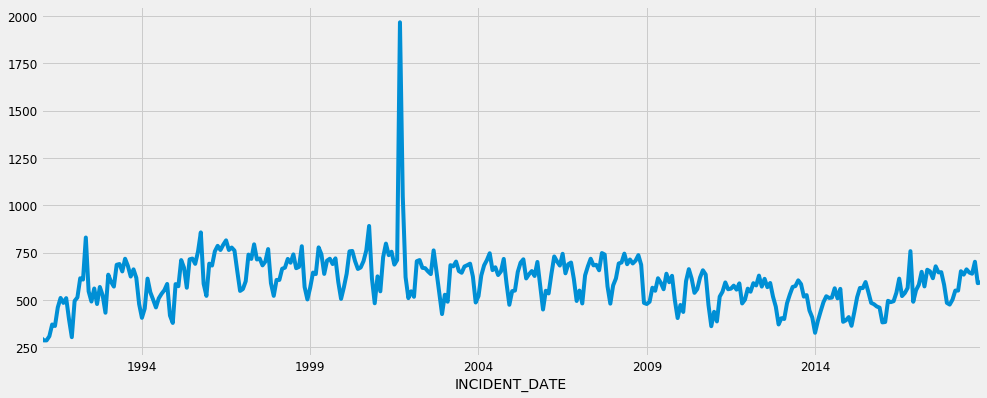

In [41]:
y.plot(figsize=(15, 6))
plt.show()

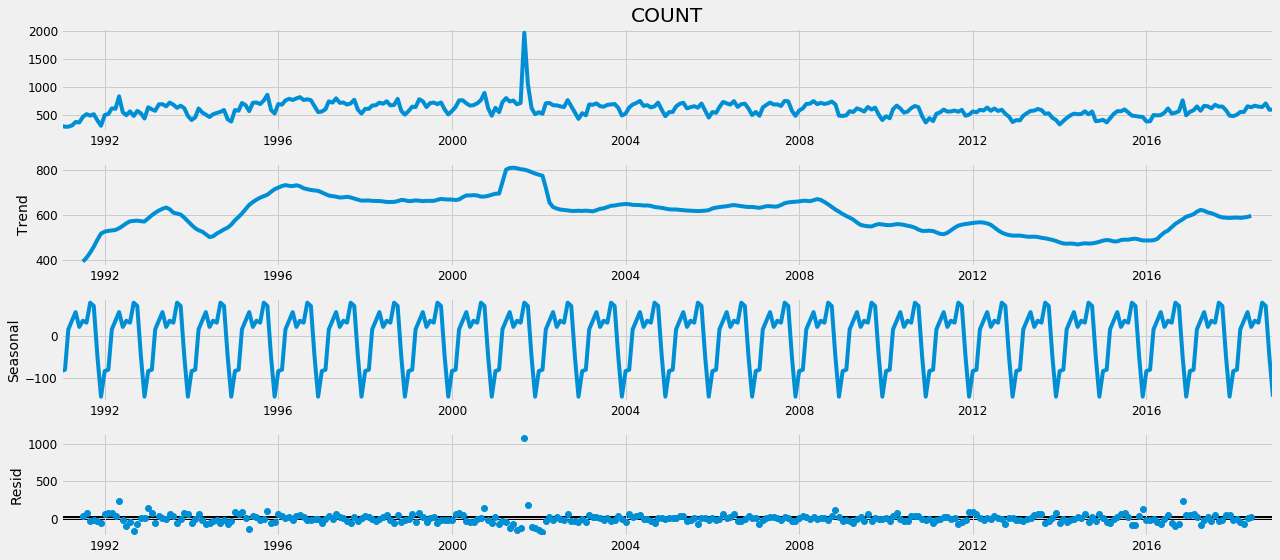

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [43]:
y

INCIDENT_DATE
1991-01-01    302
1991-02-01    287
1991-03-01    287
1991-04-01    309
1991-05-01    371
             ... 
2018-08-01    645
2018-09-01    639
2018-10-01    702
2018-11-01    589
2018-12-01    593
Freq: MS, Name: COUNT, Length: 336, dtype: int64

In [44]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5255.630518996017
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4748.587840367842
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4082.0337309659863
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3833.648444598893
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4096.502399758865
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4006.9217801257523
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3879.1104719072964
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3818.7154188452996
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4880.262216427435
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4473.81586284536
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4017.295449835655
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3761.759766039016
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4043.0540064306942
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3922.545132820997
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3832.307650073112
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3753.1962539983506
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4145.432476746145
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3981.857646252467
ARIMA

In [46]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2739      0.049      5.628      0.000       0.179       0.369
ma.L1         -0.8846      0.039    -22.726      0.000      -0.961      -0.808
ar.S.L12       0.0663      0.043      1.552      0.121      -0.017       0.150
ma.S.L12      -0.9618      0.110     -8.767      0.000      -1.177      -0.747
sigma2      8410.4200    693.671     12.125      0.000    7050.850    9769.990


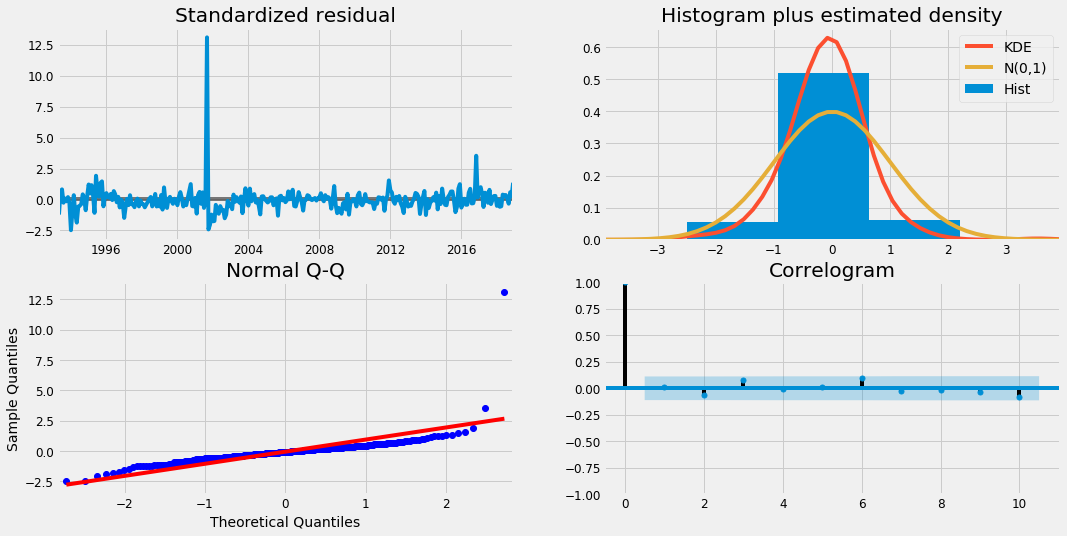

In [47]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

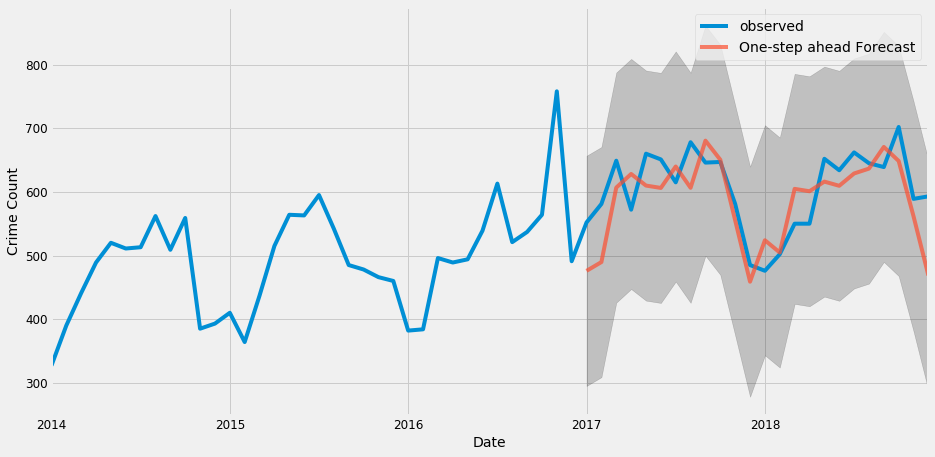

In [48]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Count')
plt.legend()
plt.show()

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y['2017':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2620.66


In [50]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 51.19


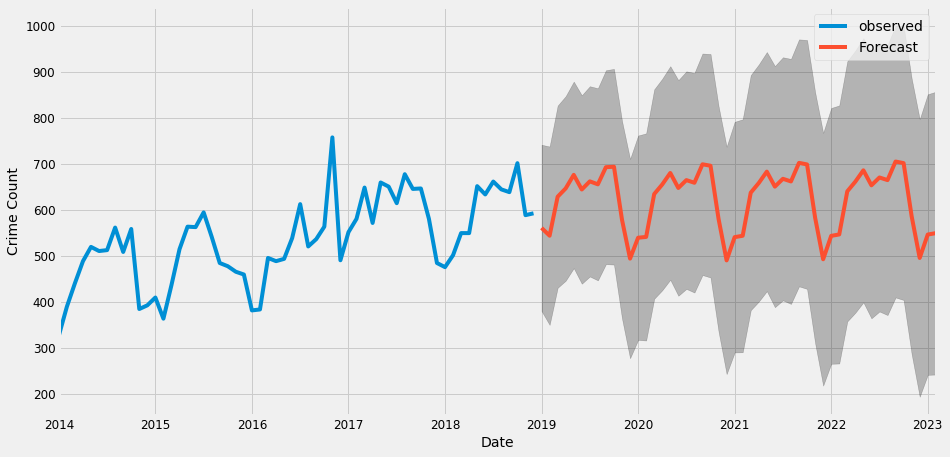

In [51]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y['2014':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Count')
plt.legend()
plt.show()

In [52]:
mape = np.mean(np.abs(pred.predicted_mean - y['2017':].values)/np.abs(y['2017':].values))

In [53]:
mape

0.07261519775481401